<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
sac_df = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
sac_df.shape

(985, 12)

In [5]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### Directly below, I am checking to see if there are any NaN cells in any of the columns in the dataset.

There do not seem to be any.

In [6]:
sac_df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

#### Are all houses listed in the data set in Sacramento? Or are they in different cities/neighbordhoods?

In [7]:
sac_df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON',
       'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE',
       'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL',
       'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE',
       'GARDEN VALLEY', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [8]:
sac_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

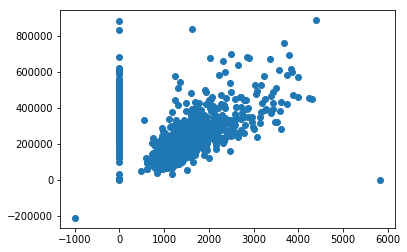

In [9]:
plt.scatter(x=sac_df['sq__ft'], y=sac_df['price']);

#### Are all houses listed in the data set in CA? They should be.

In [10]:
sac_df['state'].unique()

array(['CA', 'AC'], dtype=object)

#### Apparently, there are houses listed in the state of 'AC', which doesn't exist - I am assuming this is a typo and should be 'CA'.

In [11]:
sac_df[sac_df['state'] == 'AC']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [12]:
sac_df['state'] = 'CA'

#### From the above, I also notice that the sq ft. and price are both negative.  I also notice that the latitude and longitude have been switched.

In [13]:
sac_df.loc[703,'price'] = abs(sac_df.loc[703,'price'])

In [14]:
sac_df.loc[703,'price']

210944

In [15]:
sac_df.loc[703,'sq__ft'] = abs(sac_df.loc[703,'sq__ft'])

In [16]:
sac_df.loc[703,'sq__ft']

984

In [17]:
should_long = sac_df.loc[703,'latitude']

In [18]:
should_lat = sac_df.loc[703,'longitude']

In [19]:
sac_df.loc[703,'longitude'] = should_long

In [20]:
sac_df.loc[703,'latitude'] = should_lat

In [21]:
sac_df[(sac_df['latitude'] == should_lat) & (sac_df['longitude'] == should_long)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,CA,1,1,984,Condo,Fri May 16 00:00:00 EDT 2008,210944,38.668433,-121.503471


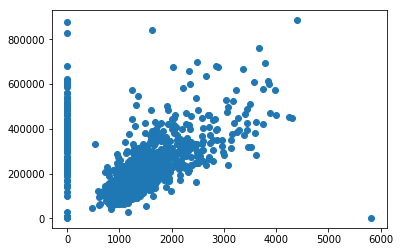

In [22]:
plt.scatter(x=sac_df['sq__ft'], y=sac_df['price']);

In [23]:
sac_df = sac_df[(sac_df.sq__ft > 0)]

In [24]:
sac_df[sac_df['sq__ft'] == 0].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


#### I'm going to make the assumption that listings where sq. ft. = 0 and price > 0 are an error in the data.  Therefore, I will drop the rows where the sq. ft. is 0, since it will considerably skew/manipulate the Beta for sq. ft.

In [25]:
sac_df[sac_df['sq__ft'] == 0].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


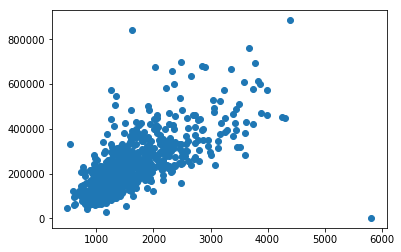

In [26]:
plt.scatter(x=sac_df['sq__ft'], y=sac_df['price']);

1.  It seems like there is an error in on of the home's sq. ft. recording as it is listed around -1000.

2.  There are multiple homes listed as having 0 sq. ft., which may be correct for one or two of the listings (those with a price near 0), but for the homes that are listed as having 0 sq. ft. but range between 5,000 and 100,000, I find this very unlikely, unless it is a plot of land that is being sold and not a home.

3.  There is a home listed as having nearly 6000 square feet, which would make it the largest in the data set, yet its price is near 0; either the price or the sq. ft. of this home were entered incorrectly.

4.  I notice a positive, linear correlation between sq. ft. and price, which makes sense.

In [27]:
sac_df[sac_df['sq__ft'] == 0].count()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [28]:
sac_df.count()

street       814
city         814
zip          814
state        814
beds         814
baths        814
sq__ft       814
type         814
sale_date    814
price        814
latitude     814
longitude    814
dtype: int64

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [29]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

# A:

The variables I believe are predictors of price are:
    1. zip
    2. beds
    3. sq__ft
    4. type
    5. baths
    6. sale_date

Text(0, 0.5, 'Price')

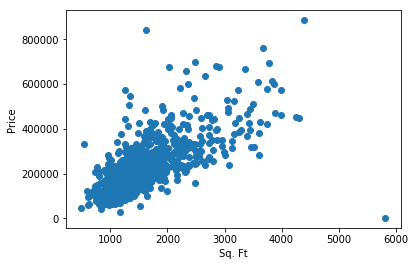

In [30]:
plt.scatter(x=sac_df['sq__ft'], y=sac_df['price']);
plt.xlabel('Sq. Ft')
plt.ylabel('Price')

In [31]:
def lin_rel_plot(x, y):
    plt.scatter(x, y);

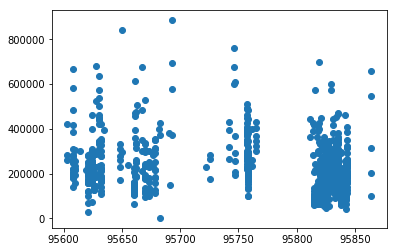

In [32]:
lin_rel_plot(x=sac_df['zip'], y=sac_df['price'])

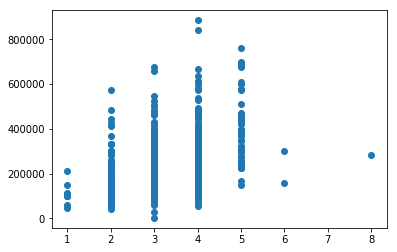

In [33]:
lin_rel_plot(x=sac_df['beds'], y=sac_df['price'])

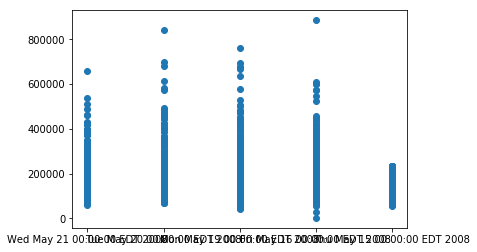

In [34]:
lin_rel_plot(x=sac_df['sale_date'], y=sac_df['price'])

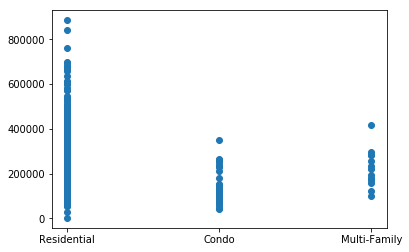

In [35]:
lin_rel_plot(x=sac_df['type'], y=sac_df['price'])

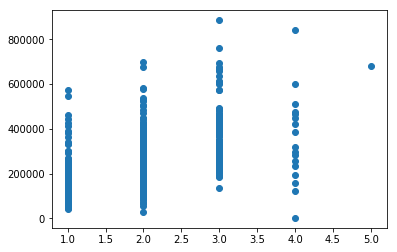

In [36]:
lin_rel_plot(x=sac_df['baths'], y=sac_df['price'])

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

# A:

It seems like sq. ft. is the best predictor of Y.  The other potential predictors that I listed do not have linear relationships with Y, therefore, I wouldn't be comfortable using them as predictors.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [37]:
def x_y_int_slope(X, y):
    y_bar = np.mean(y)
    X_bar = np.mean(X)
    std_dev_y = np.std(y, ddof=1)
    std_dev_X = np.std(X, ddof=1)
    r_xy = stats.pearsonr(X, y)[0]
    beta_1 = r_xy * (std_dev_y / std_dev_X)
    beta_0 = y_bar - beta_1 * X_bar
    x_y_int_slope.linear_y_hat = beta_0 + beta_1 * X
    print("Intercept Coefficient: {}".format(beta_0))
    print("Slope Coefficient: {}".format(beta_1))
    

In [38]:
x_y_int_slope(X=sac_df['sq__ft'], y=sac_df['price'])

Intercept Coefficient: 30210.633866919117
Slope Coefficient: 125.21648667984451


### 6. Interpret the intercept. Interpret the slope.

# A:

The Intercept is the value that is returned when our X input variable(s) is equal to 0.

The Slope is the value that our Y/dependent variable changes when our X/independent variable is increased by one unit.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

# A:

We can use the Intercept and the Slope to provide us with a line of best fit and a predicted value of y for every value of input X.

It can be used for inference by first setting a null and alternative hypotheses (usually, the hypotheses are: $$
H_0: \beta_i = 0 \\  H_1: \beta_i \ne 0 $$), then by setting a value for alpha.  Next, we would compare the alpha to the p-value.  Depending on whether or not our alpha is greater than, equal to, or less than our p-value, we would accept or reject our null hypothesis and accept or reject our alternative hypothesis.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [39]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Intercept Coefficient: 30210.633866919117
Slope Coefficient: 125.21648667984451


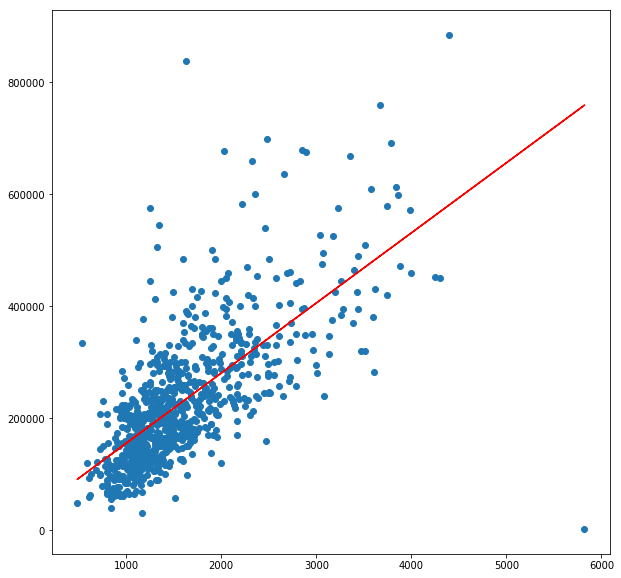

In [40]:
x = sac_df['sq__ft']
y = sac_df['price']

x_y_int_slope(x, y)

plt.figure(figsize=(10,10))

plt.scatter(x, y);
plt.plot(x, x_y_int_slope.linear_y_hat, c='r');


---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [41]:
types_df = pd.get_dummies(sac_df['type'])

types_df.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [42]:
types_df.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [43]:
sac_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

## All of the 'Unkown' types were deleted when I removed the listings with 0 sq. ft.  With this said, I can delete another one of the type columns since it is not necessary.

In [44]:
types_df.drop('Condo', axis=1, inplace=True)

In [45]:
sac_df = sac_df.merge(types_df, left_index=True, right_index=True)

In [46]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [47]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

y = sac_df['price']
X = sac_df[['beds','baths','sq__ft','Multi-Family','Residential']]

lm = linear_model.LinearRegression()

model = lm.fit(X, y)

predictions = model.predict(X)

In [48]:
lm.score(X, y)
#sklearn.metrics.mean_squared_error(y, y_hat)

0.4915623473809328

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

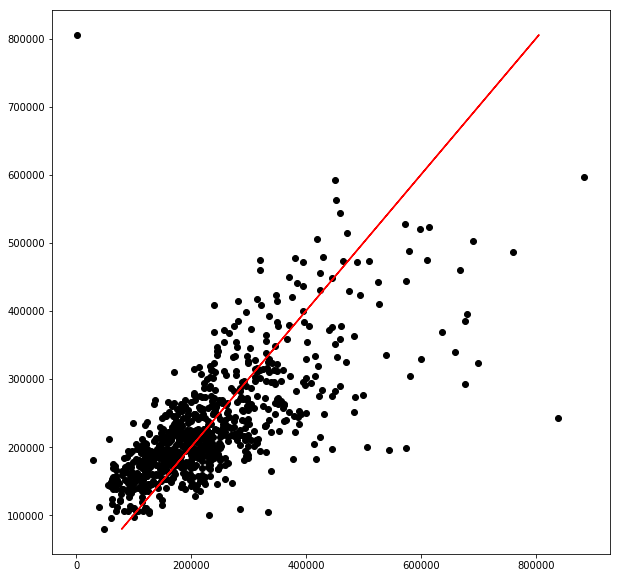

In [49]:
#x_y_int_slope(X, y)

plt.figure(figsize=(10,10))

plt.scatter(y, predictions, c='k');
plt.plot(predictions, predictions, color='r');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

# A:

Linearity - I do believe that this assumption is met; I believe that the price of a home has an approximately linear relationship with each of the six X inputs (beds, baths, sq__ft, Condo, Multi-Family, Residential).

Independence Part 2 - I do not believe this assumption is met in my model because the number of bedrooms in a house can easily influence how many bathrooms there are.



### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [50]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [51]:
def r2_adj(X, y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    
    lr = linear_model.LinearRegression()
    model = lr.fit(X, y)
    
    r_squared = model.score(X, y)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    print("Adjusted R-squared: {}".format(adj_r_squared))
    

In [52]:
r2_adj(X, y)

Adjusted R-squared: 0.488416074778092


### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [53]:
def regression_metrics(X, y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    import pandas as pd
    
    linear = linear_model.LinearRegression()
    model = linear.fit(X, y)
    y_hat = model.predict(X)

    r_squared = model.score(X, y)
    mean_squared_err = metrics.mean_squared_error(y, y_hat)
    root_mean_squared_err = np.sqrt(mean_squared_err)
    mean_abs_err = metrics.mean_absolute_error(y, y_hat)
    median_abs_err = metrics.median_absolute_error(y, y_hat)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    
    print("R-squared: {}".format(r_squared))
    print("Adjusted R-squared: {}".format(adj_r_squared))
    print("Mean Squared Error: {}".format(mean_squared_err))
    print("Root Mean Squared Error: {}".format(root_mean_squared_err))
    print("Mean Absolute Error: {}".format(mean_abs_err))
    print("Median Absolute Error: {}".format(median_abs_err))

In [54]:
regression_metrics(X, y)

R-squared: 0.4915623473809328
Adjusted R-squared: 0.488416074778092
Mean Squared Error: 7291265232.698609
Root Mean Squared Error: 85388.90579401172
Mean Absolute Error: 59105.16090465707
Median Absolute Error: 46377.35007923386


Helpful Link:
    https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

#### Current home price prediction model's six metrics are found directly above:
    -  R-squared: 0.4915623473809328
    -  Adjusted R-squared: 0.488416074778092
    -  Mean Squared Error: 7291265232.698609
    -  Root Mean Squared Error: 85388.90579401172
    -  Mean Absolute Error: 59105.16090465707
    -  Median Absolute Error: 46377.35007923386

In [55]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


In [56]:
sac_df['day_of_week'] = [_[0:3] for _ in sac_df['sale_date']]

In [57]:
day_of_week_df = pd.get_dummies(sac_df['day_of_week'])

In [58]:
day_of_week_df.head()

,Fri,Mon,Thu,Tue,Wed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [59]:
day_of_week_df.drop('Fri', axis=1, inplace=True)

In [60]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Multi-Family,Residential,day_of_week
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1,Wed
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1,Wed
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1,Wed
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1,Wed
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1,Wed


In [61]:
sac_df = sac_df.merge(day_of_week_df, left_index=True, right_index=True)

In [62]:
sac_df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [63]:
cities_df = pd.get_dummies(sac_df['city'])

In [64]:
cities_df.head()

,ANTELOPE,AUBURN,CAMERON PARK,CARMICHAEL,CITRUS HEIGHTS,COOL,DIAMOND SPRINGS,EL DORADO,EL DORADO HILLS,ELK GROVE,...,RANCHO CORDOVA,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
cities_df.drop('ANTELOPE', axis=1, inplace=True)

In [66]:
sac_df = sac_df.merge(cities_df, left_index=True, right_index=True)

In [67]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,RANCHO CORDOVA,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,0,0,0,1,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,0,0,0,1,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,...,0,0,0,0,0,1,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,...,0,0,0,0,0,1,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,...,0,0,0,0,0,1,0,0,0,0


In [68]:
sac_df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'Multi-Family',
       'Residential', 'day_of_week', 'Mon', 'Thu', 'Tue', 'Wed', 'AUBURN',
       'CAMERON PARK', 'CARMICHAEL', 'CITRUS HEIGHTS', 'COOL',
       'DIAMOND SPRINGS', 'EL DORADO', 'EL DORADO HILLS', 'ELK GROVE',
       'ELVERTA', 'FAIR OAKS', 'FOLSOM', 'GALT', 'GOLD RIVER', 'GRANITE BAY',
       'GREENWOOD', 'LINCOLN', 'LOOMIS', 'MATHER', 'MEADOW VISTA',
       'NORTH HIGHLANDS', 'ORANGEVALE', 'PENRYN', 'PLACERVILLE',
       'POLLOCK PINES', 'RANCHO CORDOVA', 'RANCHO MURIETA', 'RIO LINDA',
       'ROCKLIN', 'ROSEVILLE', 'SACRAMENTO', 'SLOUGHHOUSE', 'WALNUT GROVE',
       'WEST SACRAMENTO', 'WILTON'],
      dtype='object')

In [69]:
sac_df.drop('day_of_week', axis=1, inplace=True)

In [70]:
sac_df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'Multi-Family',
       'Residential', 'Mon', 'Thu', 'Tue', 'Wed', 'AUBURN', 'CAMERON PARK',
       'CARMICHAEL', 'CITRUS HEIGHTS', 'COOL', 'DIAMOND SPRINGS', 'EL DORADO',
       'EL DORADO HILLS', 'ELK GROVE', 'ELVERTA', 'FAIR OAKS', 'FOLSOM',
       'GALT', 'GOLD RIVER', 'GRANITE BAY', 'GREENWOOD', 'LINCOLN', 'LOOMIS',
       'MATHER', 'MEADOW VISTA', 'NORTH HIGHLANDS', 'ORANGEVALE', 'PENRYN',
       'PLACERVILLE', 'POLLOCK PINES', 'RANCHO CORDOVA', 'RANCHO MURIETA',
       'RIO LINDA', 'ROCKLIN', 'ROSEVILLE', 'SACRAMENTO', 'SLOUGHHOUSE',
       'WALNUT GROVE', 'WEST SACRAMENTO', 'WILTON'],
      dtype='object')

In [71]:
sac_df['zip'].unique()

array([95838, 95823, 95815, 95824, 95841, 95842, 95820, 95670, 95673,
       95822, 95621, 95833, 95660, 95834, 95843, 95832, 95827, 95828,
       95758, 95626, 95825, 95835, 95624, 95632, 95826, 95608, 95662,
       95630, 95829, 95655, 95757, 95726, 95818, 95742, 95683, 95693,
       95831, 95814, 95635, 95864, 95817, 95628, 95667, 95610, 95722,
       95816, 95678, 95747, 95648, 95819, 95811, 95682, 95765, 95661,
       95650, 95821, 95603, 95762, 95677, 95623, 95663, 95746, 95619,
       95614, 95690, 95691])

In [72]:
zips_df = pd.get_dummies(sac_df['zip'])

In [73]:
zips_df.columns = [str(_) for _ in zips_df.columns]

In [74]:
zips_df.drop('95838', axis=1, inplace=True)

In [75]:
sac_df = sac_df.merge(zips_df, left_index=True, right_index=True)

In [76]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,95829,95831,95832,95833,95834,95835,95841,95842,95843,95864
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,0,0,0,0,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,0,0,0,0,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,...,0,0,0,0,0,0,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,...,0,0,0,0,0,0,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,...,0,0,0,0,0,0,0,0,0,0


In [77]:
zips_df.columns.unique()

Index(['95603', '95608', '95610', '95614', '95619', '95621', '95623', '95624',
       '95626', '95628', '95630', '95632', '95635', '95648', '95650', '95655',
       '95660', '95661', '95662', '95663', '95667', '95670', '95673', '95677',
       '95678', '95682', '95683', '95690', '95691', '95693', '95722', '95726',
       '95742', '95746', '95747', '95757', '95758', '95762', '95765', '95811',
       '95814', '95815', '95816', '95817', '95818', '95819', '95820', '95821',
       '95822', '95823', '95824', '95825', '95826', '95827', '95828', '95829',
       '95831', '95832', '95833', '95834', '95835', '95841', '95842', '95843',
       '95864'],
      dtype='object')

In [78]:
y = sac_df['price']
X = sac_df[['beds','baths','sq__ft','Multi-Family','Residential', 'Mon', 'Thu', 'Tue', 'Wed','AUBURN', 'CAMERON PARK',
        'CARMICHAEL', 'CITRUS HEIGHTS', 'COOL', 'DIAMOND SPRINGS', 'EL DORADO',
       'EL DORADO HILLS', 'ELK GROVE', 'ELVERTA', 'FAIR OAKS', 'FOLSOM',
       'GALT', 'GOLD RIVER', 'GRANITE BAY', 'GREENWOOD', 'LINCOLN', 'LOOMIS',
       'MATHER', 'MEADOW VISTA', 'NORTH HIGHLANDS', 'ORANGEVALE', 'PENRYN',
       'PLACERVILLE', 'POLLOCK PINES', 'RANCHO CORDOVA', 'RANCHO MURIETA',
       'RIO LINDA', 'ROCKLIN', 'ROSEVILLE', 'SACRAMENTO', 'SLOUGHHOUSE',
       'WALNUT GROVE', 'WEST SACRAMENTO', 'WILTON','95603', '95608', '95610', '95614', '95619', '95621', '95623', '95624',
       '95626', '95628', '95630', '95632', '95635', '95648', '95650', '95655',
       '95660', '95661', '95662', '95663', '95667', '95670', '95673', '95677',
       '95678', '95682', '95683', '95690', '95691', '95693', '95722', '95726',
       '95742', '95746', '95747', '95757', '95758', '95762', '95765', '95811',
       '95814', '95815', '95816', '95817', '95818', '95819', '95820', '95821',
       '95822', '95823', '95824', '95825', '95826', '95827', '95828', '95829',
       '95831', '95832', '95833', '95834', '95835', '95841', '95842', '95843',
       '95864']]

lm = linear_model.LinearRegression()

model = lm.fit(X, y)

predictions = model.predict(X)

In [79]:
regression_metrics(X, y)

R-squared: 0.7535359109921853
Adjusted R-squared: 0.7153759881202367
Mean Squared Error: 3534425576.143931
Root Mean Squared Error: 59451.03511415029
Mean Absolute Error: 42922.82260044853
Median Absolute Error: 32093.591501881805


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

# A:

At this point, I believe my model is high in bias, seeing that it seems like a simple model. I also noticed that when I added another input to the model, the R^2 value increased, suggesting that I can improve my model by increasing the complexity of it.  If I must increase the complexity of my model to improve its R^2, the model is Biased.